In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

#DATA IMPORTATION


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/deep learning /hotel_bookings.csv")

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


#DATA STRUCTURE :


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
## take a look in variables (object and integer ones )
# we didnt see float ones cuz if they had any caracter that will apear in infos

In [ ]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


#PRE_PROSSESING:

#Missing Values

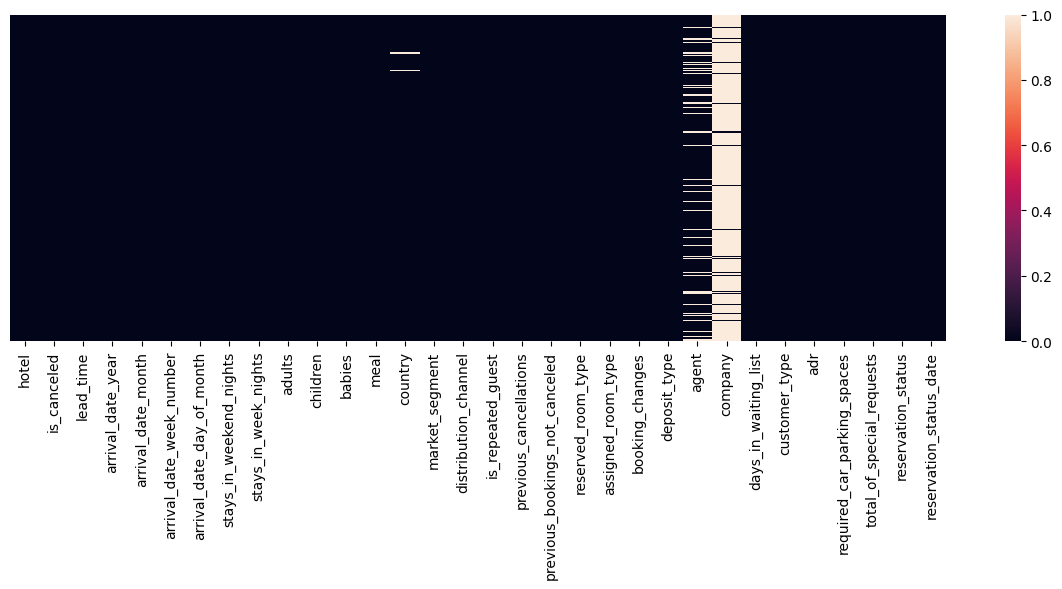

In [ ]:
#Null values heatmap :
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [ ]:
#i am gonna drop vriable with high missimg values: "company","agent"and"country"
# we drop the useless variables: i choose to drop "rservation status" cuz it's similar as "is_canceled" our target variable "

In [ ]:
df.drop(["company","agent","country","reservation_status"],inplace=True,axis=1)

In [ ]:
df=df.dropna(axis=0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date     

#Analyse Univarie


##Categorial variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

In [ ]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
count,119386,119386,119386,119386,119386,119386,119386,119386,119386,119386
unique,2,12,5,7,5,10,12,3,4,926
top,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient,2015-10-21
freq,79326,13873,92306,56476,97870,85994,74053,104637,89613,1461


In [ ]:
# we start by the depandent variable (is_canceled):

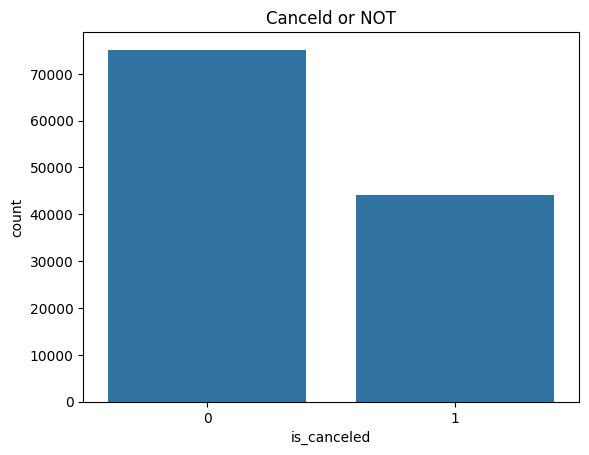

In [ ]:
#disribution of target column
sns.countplot(x=df['is_canceled'])
plt.title('Canceld or NOT');

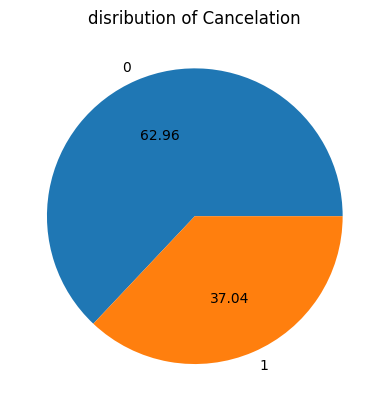

In [ ]:
#Another graph for "is_canceled" column
plt.pie(df.groupby(by=["is_canceled"]).size(), labels = df["is_canceled"].unique(), autopct = "%0.2f")
plt.title('disribution of Cancelation');
plt.show()

In [ ]:
value_counts_series = df['hotel'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'hotel': value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(79330+40060)
#display the DataFrame
print(df_value_counts)

          hotel  count  percentage
0    City Hotel  79326    0.664428
1  Resort Hotel  40060    0.335539


Text(0.5, 1.0, 'counts')

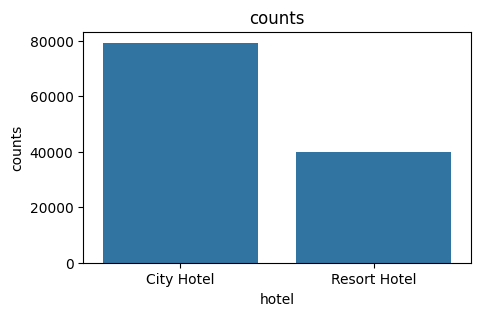

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts['hotel'] , y=df_value_counts['count'])
plt.xlabel("hotel")
plt.ylabel("counts")
plt.title("counts")

In [ ]:
total = df['reserved_room_type'].value_counts().sum()
print(total)

119386


In [ ]:
value_counts_series = df['reserved_room_type'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'reserved_room_type': value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

  reserved_room_type  count  percentage
0                  A  85994    0.720278
1                  D  19201    0.160826
2                  E   6535    0.054737
3                  F   2897    0.024265
4                  G   2094    0.017539
5                  B   1114    0.009331
6                  C    932    0.007806
7                  H    601    0.005034
8                  P     12    0.000101
9                  L      6    0.000050


Text(0.5, 1.0, 'the type of reserved room')

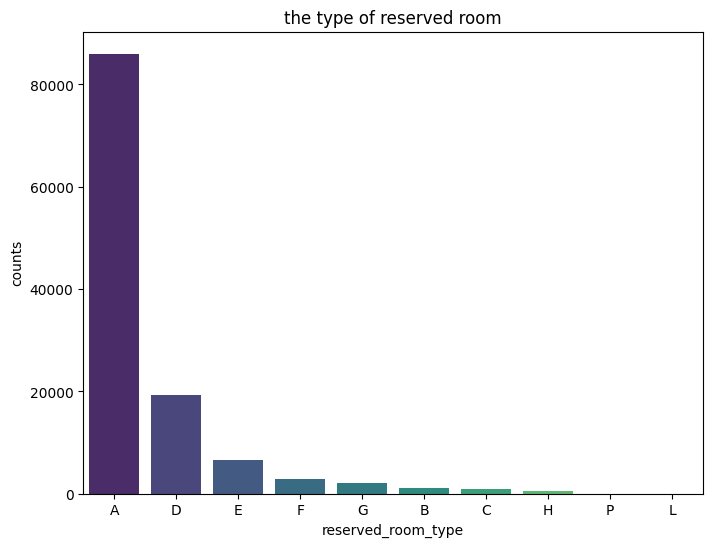

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_value_counts['reserved_room_type'] , y=df_value_counts['count'],palette='viridis')
plt.xlabel("reserved_room_type")
plt.ylabel("counts")
plt.title("the type of reserved room")

In [ ]:
value_counts_series = df['deposit_type'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'deposit_type': value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

  deposit_type   count  percentage
0   No Deposit  104637    0.876430
1   Non Refund   14587    0.122179
2   Refundable     162    0.001357


Text(0.5, 1.0, 'counts')

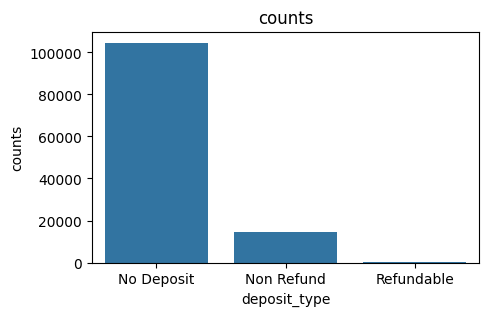

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts['deposit_type'] , y=df_value_counts['count'])
plt.xlabel("deposit_type")
plt.ylabel("counts")
plt.title("counts")

In [ ]:
value_counts_series = df['arrival_date_month'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'arrival_date_month': value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

   arrival_date_month  count  percentage
0              August  13873    0.116199
1                July  12661    0.106047
2                 May  11791    0.098760
3             October  11160    0.093475
4               April  11089    0.092880
5                June  10939    0.091624
6           September  10508    0.088014
7               March   9794    0.082034
8            February   8068    0.067577
9            November   6794    0.056906
10           December   6780    0.056789
11            January   5929    0.049661


Text(0.5, 1.0, 'counts')

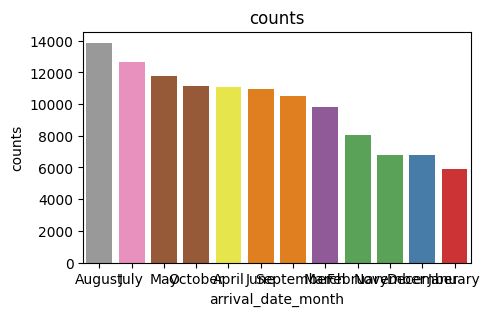

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts['arrival_date_month'] , y=df_value_counts['count'],palette='Set1_r')
plt.xlabel("arrival_date_month")
plt.ylabel("counts")
plt.title("counts")

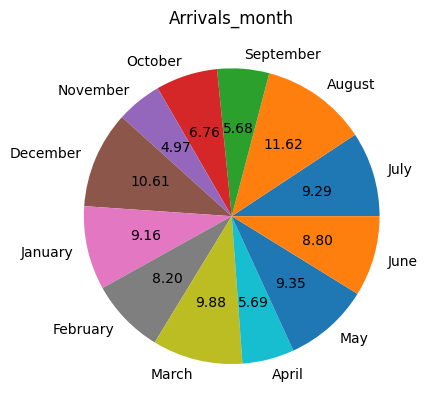

In [ ]:
plt.pie(df.groupby(by=["arrival_date_month"]).size(), labels = df["arrival_date_month"].unique(), autopct = "%0.2f")
plt.title('Arrivals_month')
plt.show()

In [ ]:
value_counts_series = df['customer_type'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'customer_type': value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

     customer_type  count  percentage
0        Transient  89613    0.750591
1  Transient-Party  25120    0.210403
2         Contract   4076    0.034140
3            Group    577    0.004833


Text(0.5, 1.0, 'counts')

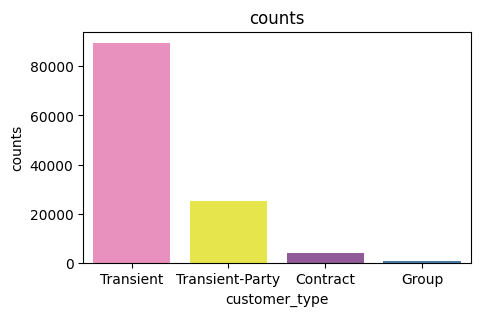

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts['customer_type'] , y=df_value_counts['count'],palette='Set1_r')
plt.xlabel("customer_type")
plt.ylabel("counts")
plt.title("counts")

In [ ]:
value_counts_series = df['is_repeated_guest'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'is_repeated_guest': value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

   is_repeated_guest   count  percentage
0                  0  115576    0.968054
1                  1    3810    0.031912


Text(0.5, 1.0, 'counts')

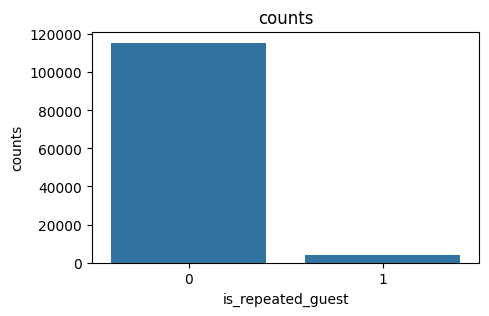

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts['is_repeated_guest'] , y=df_value_counts['count'])
plt.xlabel("is_repeated_guest")
plt.ylabel("counts")
plt.title("counts")

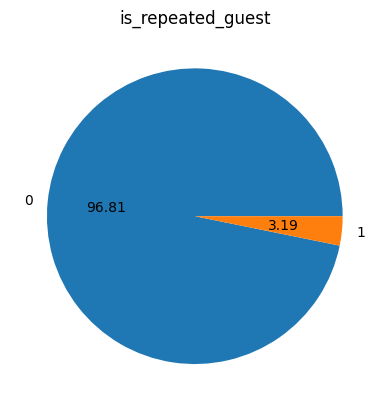

In [ ]:
#Another graph for "is_canceled" column
plt.pie(df.groupby(by=["is_repeated_guest"]).size(), labels = df["is_repeated_guest"].unique(), autopct = "%0.2f")
plt.title('is_repeated_guest');
plt.show()

In [ ]:
value_counts_series = df["required_car_parking_spaces"].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({"required_car_parking_spaces": value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

   required_car_parking_spaces   count  percentage
0                            0  111970    0.937851
1                            1    7383    0.061839
2                            2      28    0.000235
3                            3       3    0.000025
4                            8       2    0.000017


Text(0.5, 1.0, 'counts')

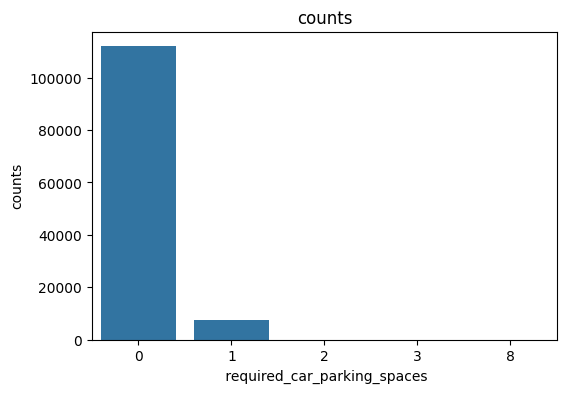

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=df_value_counts["required_car_parking_spaces"] , y=df_value_counts['count'])
plt.xlabel(" required_car_parking_spaces")
plt.ylabel("counts")
plt.title("counts")

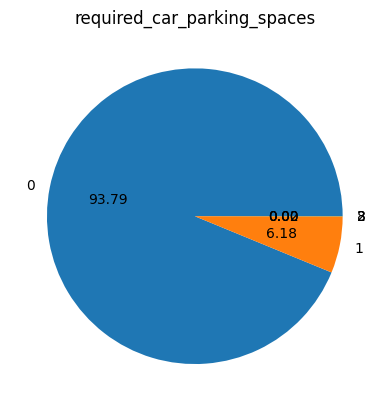

In [ ]:
#Another graph for "is_canceled" column
plt.pie(df.groupby(by=["required_car_parking_spaces"]).size(), labels = df["required_car_parking_spaces"].unique(), autopct = "%0.2f")
plt.title('required_car_parking_spaces');
plt.show()

In [ ]:
value_counts_series = df["meal"].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({"meal": value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

        meal  count  percentage
0         BB  92306    0.773147
1         HB  14463    0.121141
2         SC  10650    0.089203
3  Undefined   1169    0.009791
4         FB    798    0.006684


Text(0.5, 1.0, 'counts')

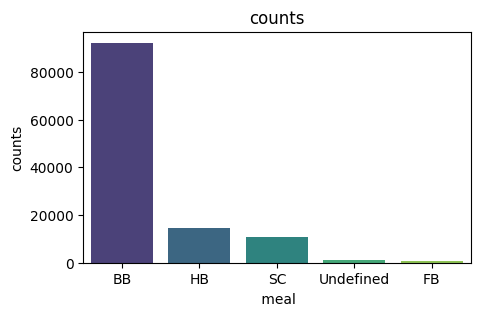

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts["meal"] , y=df_value_counts['count'],palette='viridis')
plt.xlabel(" meal")
plt.ylabel("counts")
plt.title("counts")

In [ ]:
value_counts_series = df["market_segment"].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({"market_segment": value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

  market_segment  count  percentage
0      Online TA  56476    0.473038
1  Offline TA/TO  24219    0.202856
2         Groups  19811    0.165935
3         Direct  12605    0.105578
4      Corporate   5295    0.044350
5  Complementary    743    0.006223
6       Aviation    237    0.001985


Text(0.5, 1.0, 'counts')

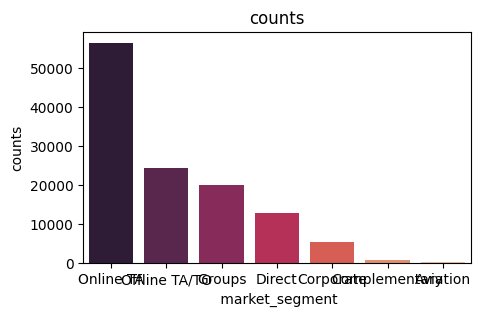

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts["market_segment"] , y=df_value_counts['count'],palette='rocket')
plt.xlabel(" market_segment")
plt.ylabel("counts")
plt.title("counts")

In [ ]:
value_counts_series = df["distribution_channel"].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({"distribution_channel": value_counts_series.index,'count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['count']/(119390)
#display the DataFrame
print(df_value_counts)

  distribution_channel  count  percentage
0                TA/TO  97870    0.819750
1               Direct  14645    0.122665
2            Corporate   6677    0.055926
3                  GDS    193    0.001617
4            Undefined      1    0.000008


Text(0.5, 1.0, 'counts')

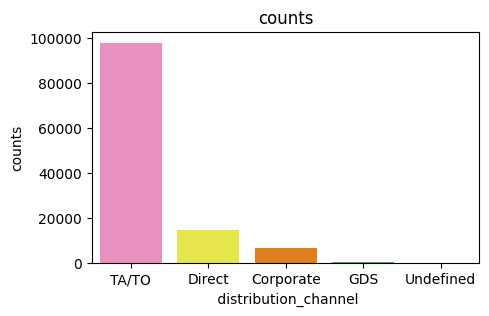

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df_value_counts["distribution_channel"] , y=df_value_counts['count'],palette='Set1_r')
plt.xlabel(" distribution_channel")
plt.ylabel("counts")
plt.title("counts")

##Numerical variable

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


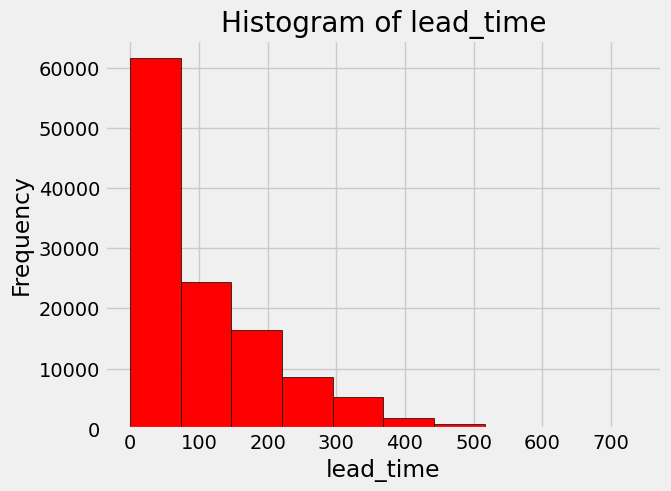

In [ ]:
# Assuming df is your DataFrame and you want to plot a histogram for the 'is_canceled' column
plt.hist(df['lead_time'], bins=10, color='red', edgecolor='black')

plt.xlabel('lead_time')
plt.ylabel('Frequency')
plt.title('Histogram of lead_time')
plt.grid(True)

plt.show()

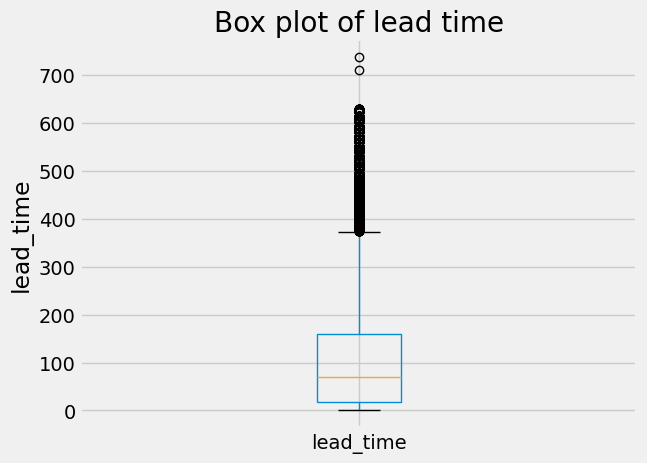

In [ ]:
#to show outlayers :
df.boxplot(column='lead_time')

plt.title('Box plot of lead time')
plt.ylabel('lead_time')

plt.show()

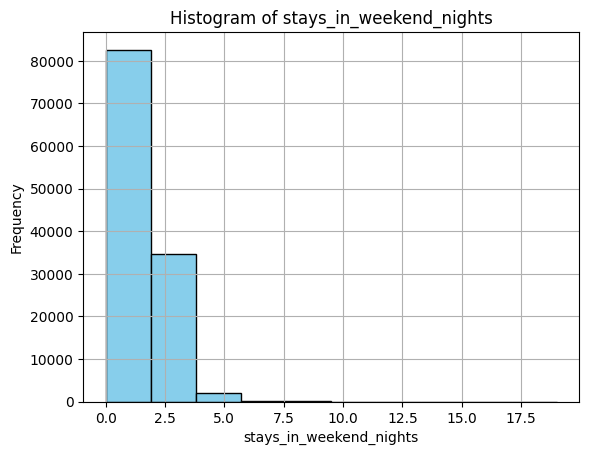

In [ ]:
plt.hist(df['stays_in_weekend_nights'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('stays_in_weekend_nights')
plt.ylabel('Frequency')
plt.title('Histogram of stays_in_weekend_nights')
plt.grid(True)

plt.show()

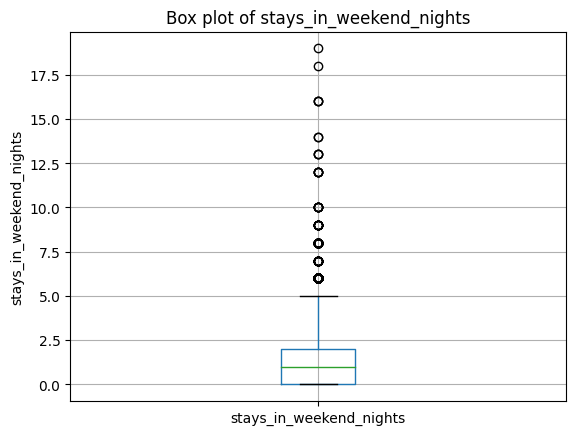

In [ ]:
df.boxplot(column='stays_in_weekend_nights')

plt.title('Box plot of stays_in_weekend_nights')
plt.ylabel('stays_in_weekend_nights')

plt.show()

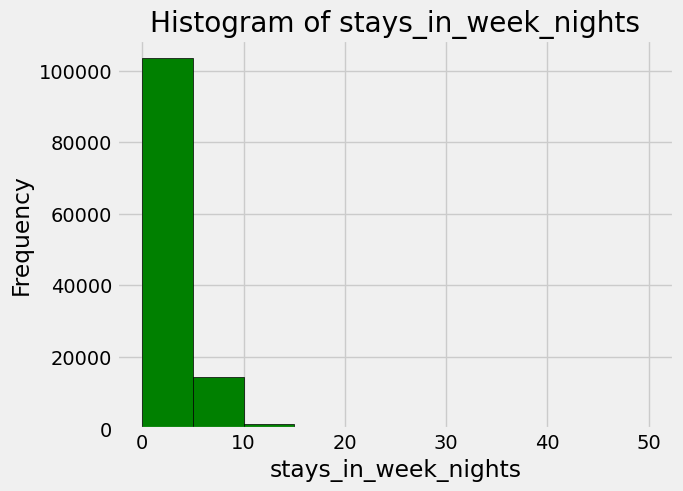

In [ ]:
plt.hist(df['stays_in_week_nights'], bins=10, color='green', edgecolor='black')

plt.xlabel('stays_in_week_nights')
plt.ylabel('Frequency')
plt.title('Histogram of stays_in_week_nights')
plt.grid(True)

plt.show()

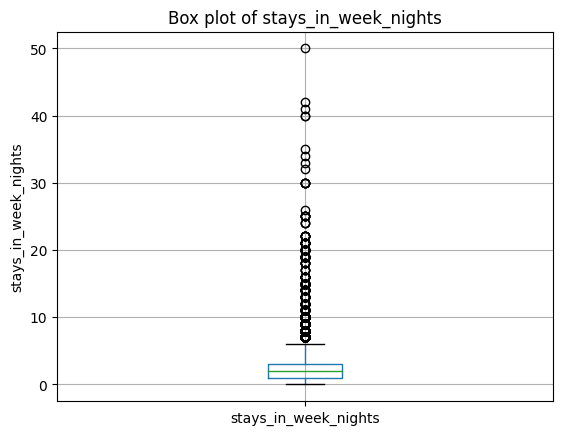

In [ ]:
df.boxplot(column='stays_in_week_nights')

plt.title('Box plot of stays_in_week_nights')
plt.ylabel('stays_in_week_nights')

plt.show()

In [ ]:
df['previous_cancellations']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: previous_cancellations, Length: 119386, dtype: int64

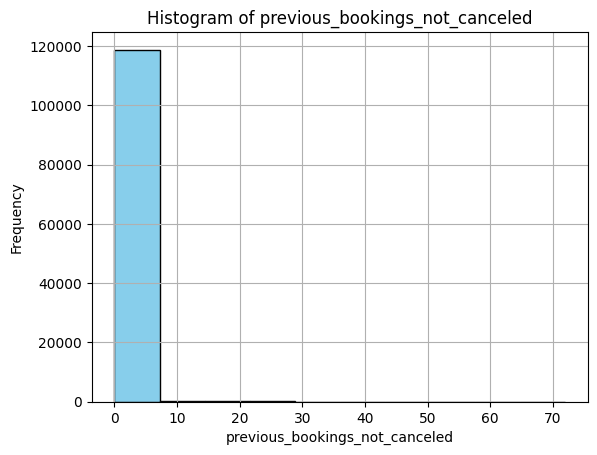

In [ ]:
plt.hist(df['previous_bookings_not_canceled'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('previous_bookings_not_canceled')
plt.ylabel('Frequency')
plt.title('Histogram of previous_bookings_not_canceled')
plt.grid(True)

plt.show()

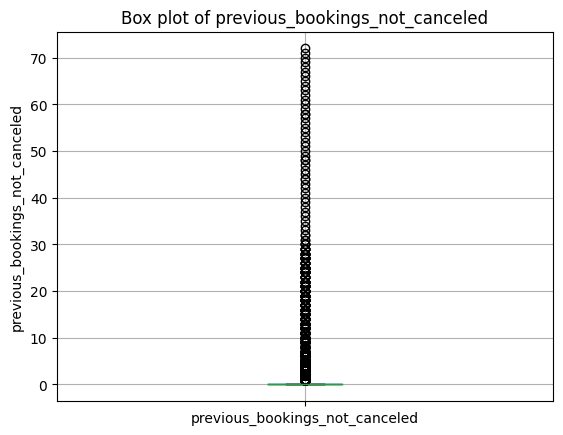

In [ ]:
df.boxplot(column='previous_bookings_not_canceled')

plt.title('Box plot of previous_bookings_not_canceled')
plt.ylabel('previous_bookings_not_canceled')

plt.show()

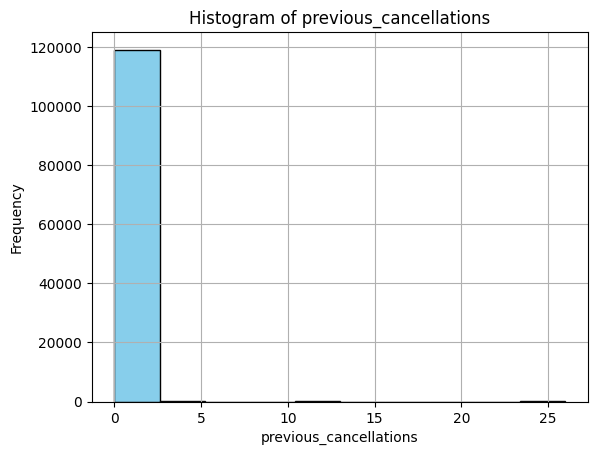

In [ ]:
plt.hist(df['previous_cancellations'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('previous_cancellations')
plt.ylabel('Frequency')
plt.title('Histogram of previous_cancellations')
plt.grid(True)

plt.show()

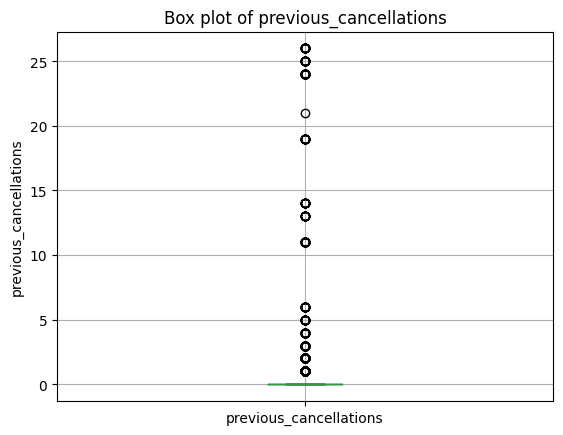

In [ ]:
df.boxplot(column='previous_cancellations')

plt.title('Box plot of previous_cancellations')
plt.ylabel('previous_cancellations')

plt.show()

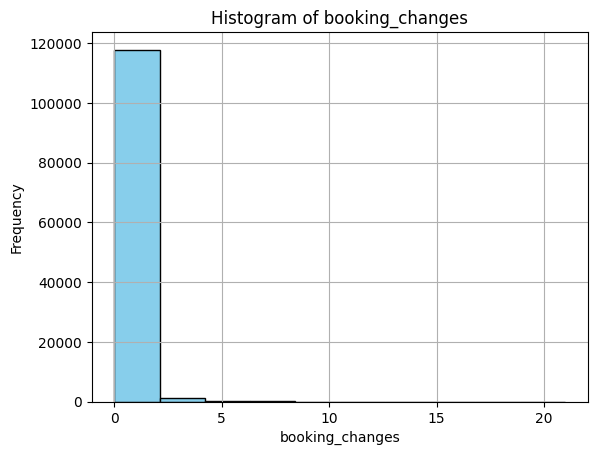

In [ ]:
plt.hist(df['booking_changes'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('booking_changes')
plt.ylabel('Frequency')
plt.title('Histogram of booking_changes')
plt.grid(True)

plt.show()

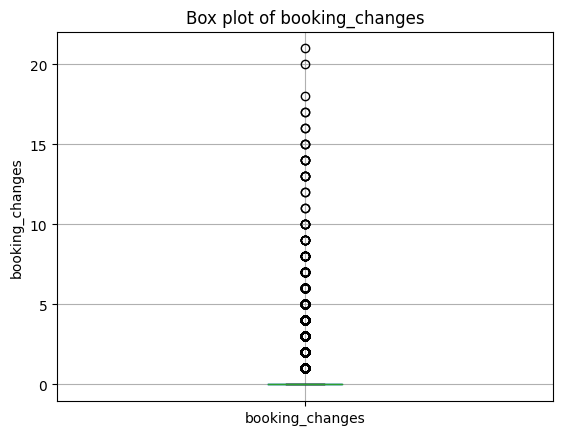

In [ ]:
df.boxplot(column='booking_changes')

plt.title('Box plot of booking_changes')
plt.ylabel('booking_changes')

plt.show()

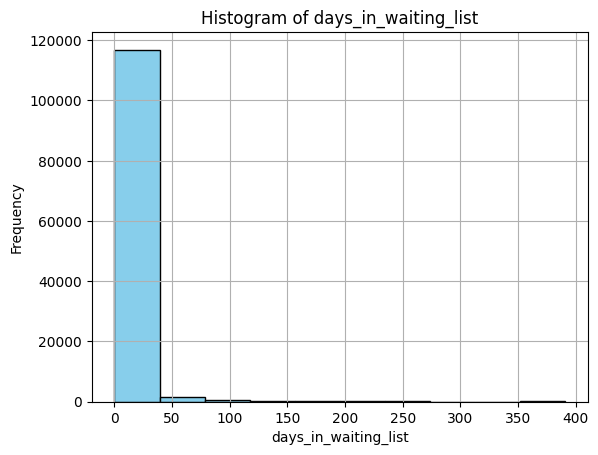

In [ ]:
plt.hist(df['days_in_waiting_list'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('days_in_waiting_list')
plt.ylabel('Frequency')
plt.title('Histogram of days_in_waiting_list')
plt.grid(True)

plt.show()

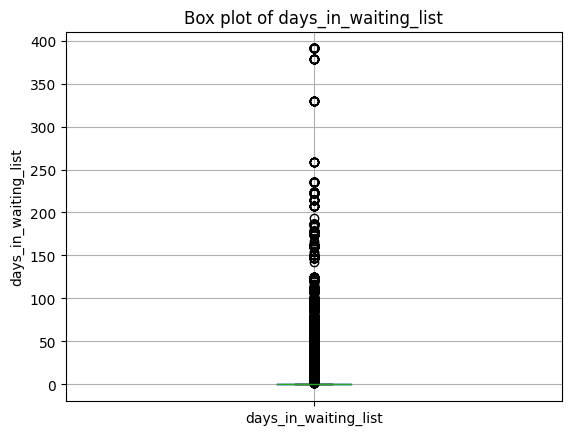

In [ ]:
df.boxplot(column='days_in_waiting_list')

plt.title('Box plot of days_in_waiting_list')
plt.ylabel('days_in_waiting_list')

plt.show()

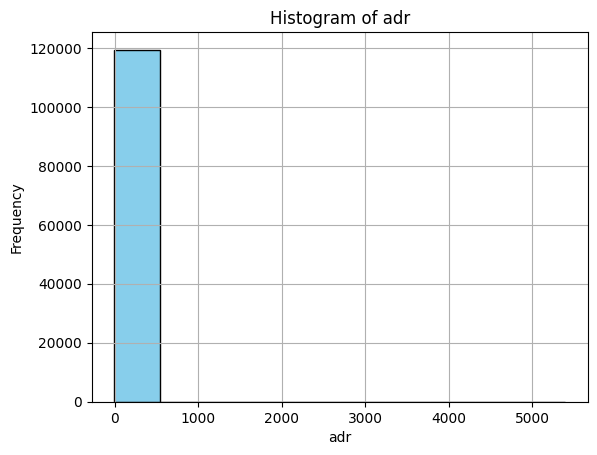

In [ ]:
plt.hist(df['adr'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('adr')
plt.ylabel('Frequency')
plt.title('Histogram of adr')
plt.grid(True)

plt.show()

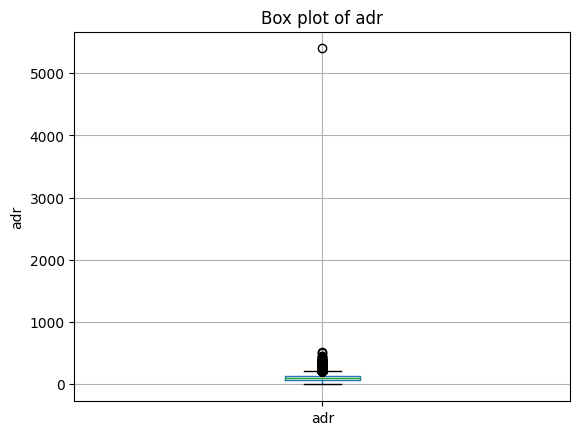

In [ ]:
df.boxplot(column='adr')

plt.title('Box plot of adr')
plt.ylabel('adr')

plt.show()

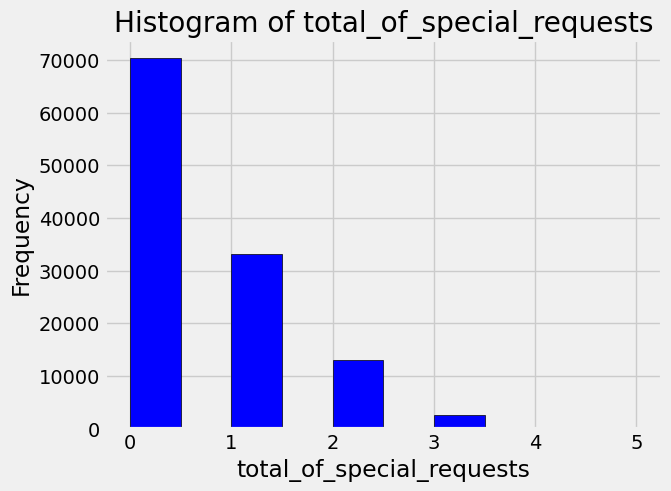

In [ ]:
plt.hist(df['total_of_special_requests'], bins=10, color='blue', edgecolor='black')

plt.xlabel('total_of_special_requests')
plt.ylabel('Frequency')
plt.title('Histogram of total_of_special_requests')
plt.grid(True)

plt.show()

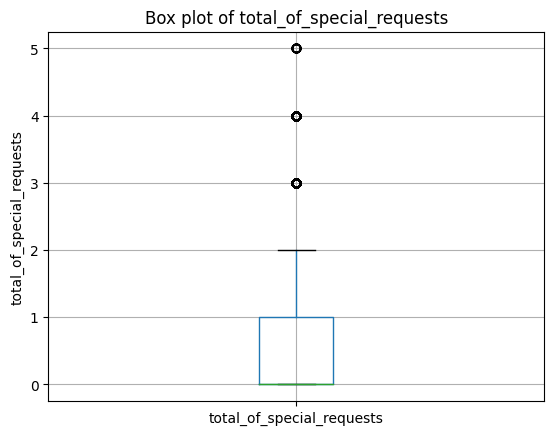

In [ ]:
df.boxplot(column='total_of_special_requests')

plt.title('Box plot of total_of_special_requests')
plt.ylabel('total_of_special_requests')

plt.show()

#ANALYSE MULTYVARIE : to show the distribution of variable in 1/0

##Categorial

In [ ]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
count,119386,119386,119386,119386,119386,119386,119386,119386,119386,119386
unique,2,12,5,7,5,10,12,3,4,926
top,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient,2015-10-21
freq,79326,13873,92306,56476,97870,85994,74053,104637,89613,1461


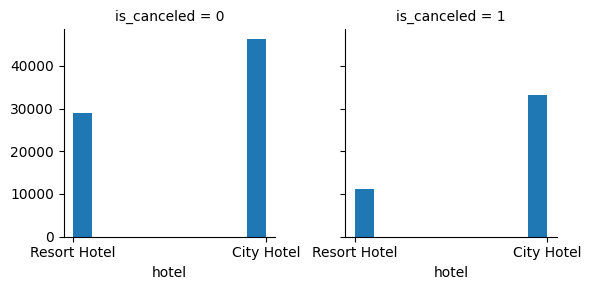

In [ ]:
hotel=sns.FacetGrid(df,col='is_canceled')
hotel.map(plt.hist,'hotel')

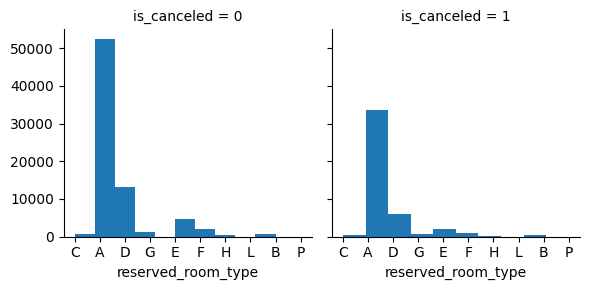

In [ ]:
reserved_room_type=sns.FacetGrid(df,col='is_canceled')
reserved_room_type.map(plt.hist,'reserved_room_type')

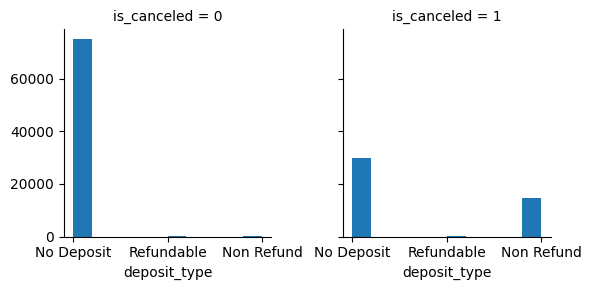

In [ ]:
deposit_type=sns.FacetGrid(df,col='is_canceled')
deposit_type.map(plt.hist,'deposit_type')

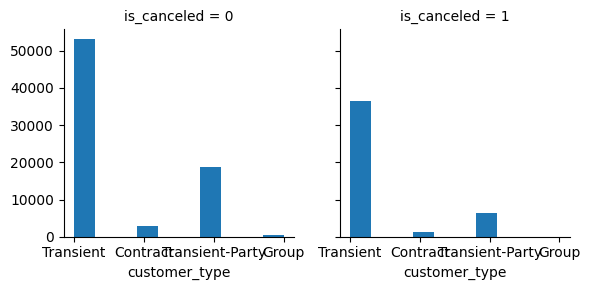

In [ ]:
customer_type=sns.FacetGrid(df,col='is_canceled')
customer_type.map(plt.hist,'customer_type')

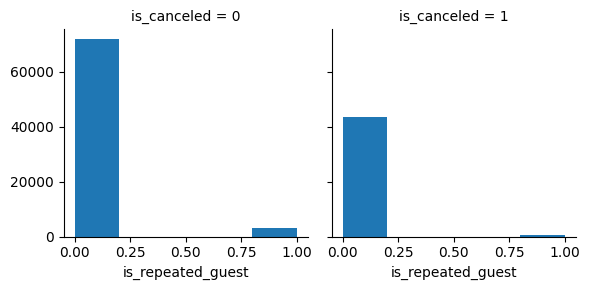

In [ ]:
is_repeated_guest=sns.FacetGrid(df,col='is_canceled')
is_repeated_guest.map(plt.hist,'is_repeated_guest',bins=5)

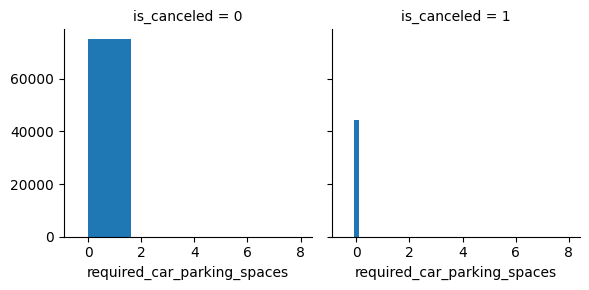

In [ ]:
required_car_parking_spaces=sns.FacetGrid(df,col='is_canceled')
required_car_parking_spaces.map(plt.hist,'required_car_parking_spaces',bins=5)

##Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

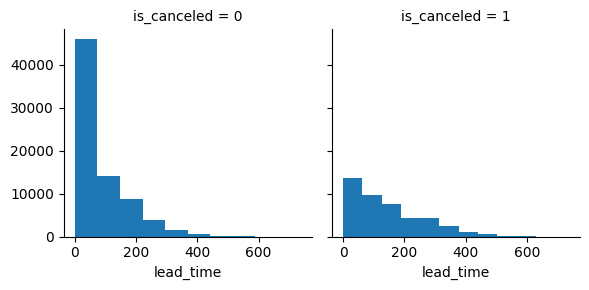

In [ ]:
lead_time=sns.FacetGrid(df,col='is_canceled')
lead_time.map(plt.hist,'lead_time')

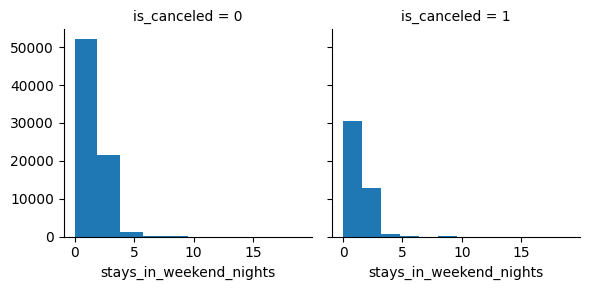

In [ ]:
stays_in_weekend_nights=sns.FacetGrid(df,col='is_canceled')
stays_in_weekend_nights.map(plt.hist,'stays_in_weekend_nights')

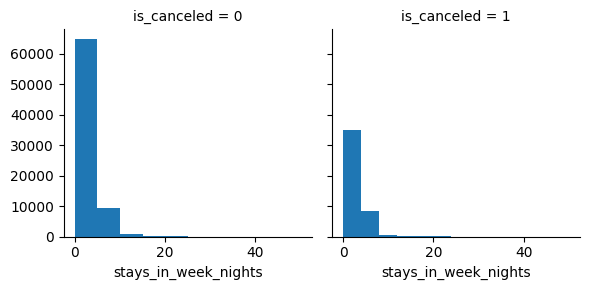

In [ ]:
stays_in_week_nights=sns.FacetGrid(df,col='is_canceled')
stays_in_week_nights.map(plt.hist,'stays_in_week_nights')

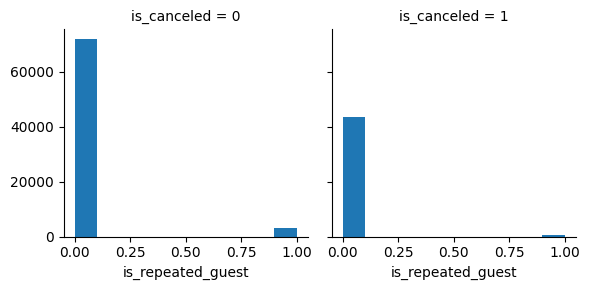

In [ ]:
is_repeated_guest=sns.FacetGrid(df,col='is_canceled')
is_repeated_guest.map(plt.hist,'is_repeated_guest')

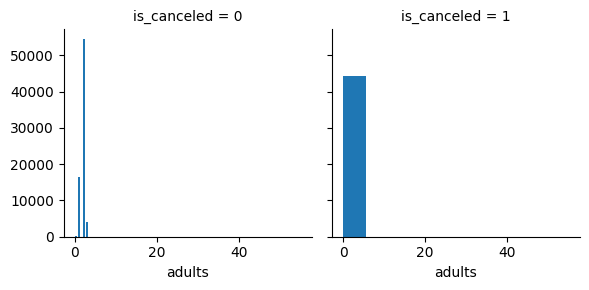

In [ ]:
adults=sns.FacetGrid(df,col='is_canceled')
adults.map(plt.hist,'adults')

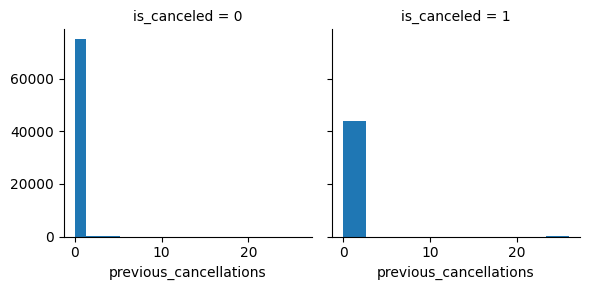

In [ ]:
previous_cancellations=sns.FacetGrid(df, col='is_canceled')
previous_cancellations.map(plt.hist, 'previous_cancellations')

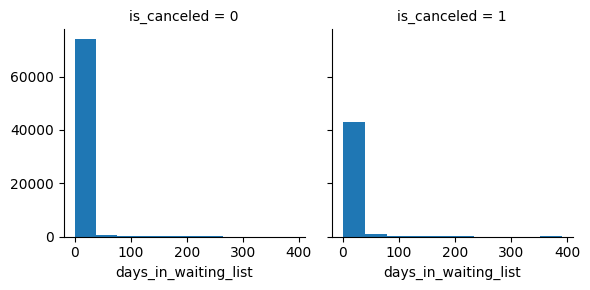

In [ ]:
days_in_waiting_list=sns.FacetGrid(df,col='is_canceled')
days_in_waiting_list.map(plt.hist,'days_in_waiting_list')

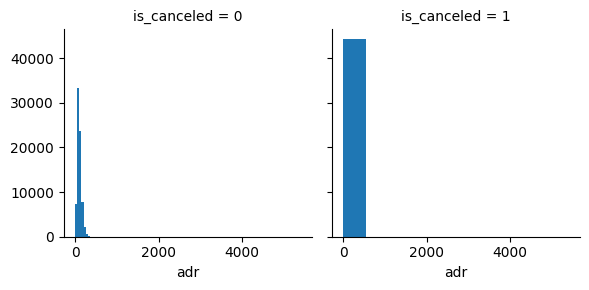

In [ ]:
adr=sns.FacetGrid(df,col='is_canceled')
adr.map(plt.hist,'adr')

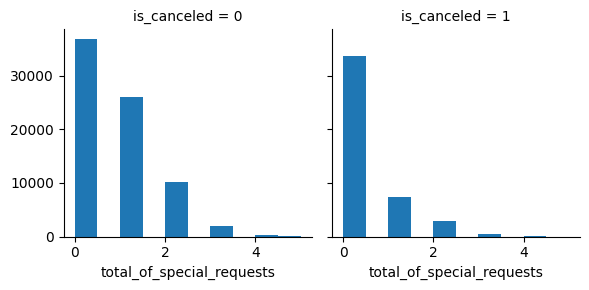

In [ ]:
total_of_special_requests=sns.FacetGrid(df,col='is_canceled')
total_of_special_requests.map(plt.hist,'total_of_special_requests')

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

In [ ]:
# NOW,we have to switch every object to a numerical:
features_to_convert = ['market_segment','arrival_date_month','meal','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status_date']

for column in features_to_convert:
    df[column] = pd.factorize(df[column])[0]

In [ ]:
# Manual label encoding of the 'hotel' column
df['hotel'] = df['hotel'].replace({"Resort Hotel": 0, "City Hotel": 1})

In [ ]:
#convert float variable to integer :
to_integer = ['adr','children']
for column in to_integer:
  df[column] = df[column].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           119386 non-null  int64
 1   is_canceled                     119386 non-null  int64
 2   lead_time                       119386 non-null  int64
 3   arrival_date_year               119386 non-null  int64
 4   arrival_date_month              119386 non-null  int64
 5   arrival_date_week_number        119386 non-null  int64
 6   arrival_date_day_of_month       119386 non-null  int64
 7   stays_in_weekend_nights         119386 non-null  int64
 8   stays_in_week_nights            119386 non-null  int64
 9   adults                          119386 non-null  int64
 10  children                        119386 non-null  int64
 11  babies                          119386 non-null  int64
 12  meal                            119386 non-null  

#MODILISATION

In [ ]:
# we have all features is x
# target variable is y

In [ ]:
x= df.drop('is_canceled', axis=1)
y=df['is_canceled']

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119386, dtype: int64

In [ ]:
# we can use even minmax /normalization/standardistion/log.......

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


In [ ]:
X=scalar.fit_transform(x)
Y=scalar.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           119386 non-null  int64
 1   is_canceled                     119386 non-null  int64
 2   lead_time                       119386 non-null  int64
 3   arrival_date_year               119386 non-null  int64
 4   arrival_date_month              119386 non-null  int64
 5   arrival_date_week_number        119386 non-null  int64
 6   arrival_date_day_of_month       119386 non-null  int64
 7   stays_in_weekend_nights         119386 non-null  int64
 8   stays_in_week_nights            119386 non-null  int64
 9   adults                          119386 non-null  int64
 10  children                        119386 non-null  int64
 11  babies                          119386 non-null  int64
 12  meal                            119386 non-null  

In [ ]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=27))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.3)

Epoch 1/100
2090/2090 [==============================] - 10s 4ms/step - loss: 0.4166 - accuracy: 0.8103 - val_loss: 0.3175 - val_accuracy: 0.8725
Epoch 2/100
2090/2090 [==============================] - 8s 4ms/step - loss: 0.2729 - accuracy: 0.8958 - val_loss: 0.2356 - val_accuracy: 0.9139
Epoch 3/100
2090/2090 [==============================] - 7s 4ms/step - loss: 0.2305 - accuracy: 0.9145 - val_loss: 0.2264 - val_accuracy: 0.9192
Epoch 4/100
2090/2090 [==============================] - 8s 4ms/step - loss: 0.2152 - accuracy: 0.9214 - val_loss: 0.2228 - val_accuracy: 0.9154
Epoch 5/100
2090/2090 [==============================] - 7s 3ms/step - loss: 0.2072 - accuracy: 0.9235 - val_loss: 0.2134 - val_accuracy: 0.9231
Epoch 6/100
2090/2090 [==============================] - 7s 4ms/step - loss: 0.2020 - accuracy: 0.9261 - val_loss: 0.2093 - val_accuracy: 0.9257
Epoch 7/100
2090/2090 [==============================] - 7s 3ms/step - loss: 0.1998 - accuracy: 0.9267 - val_loss: 0.1978 - val_a

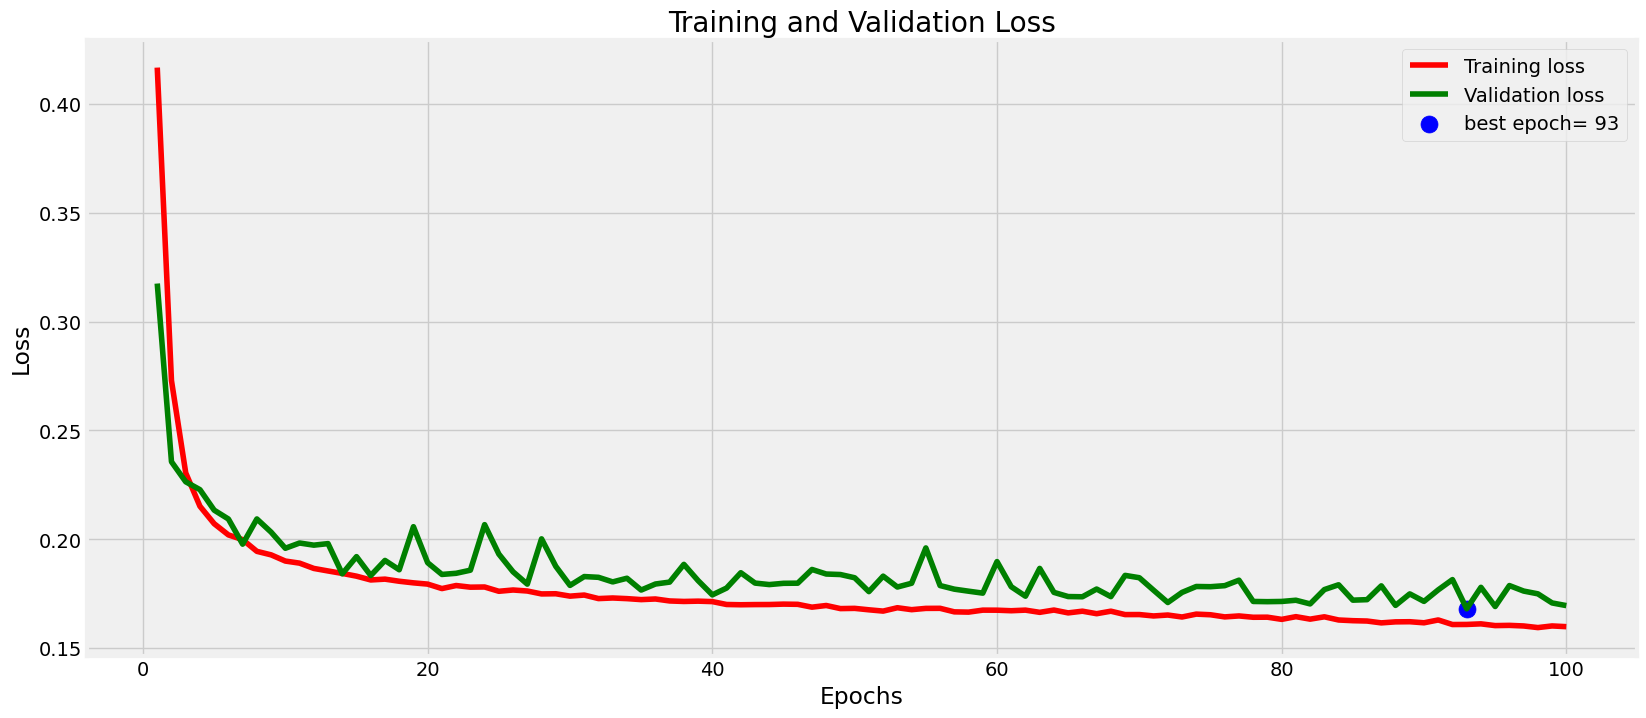

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

the bleu point is th point at which the model performed best and the epoch where the loss function is the lowest.

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

747/747 [==============================] - 1s 1ms/step


In [ ]:
# Assuming y_pred_binary is your NumPy array
Prediction = pd.DataFrame(y_pred, columns=["Prediction"])
Prediction[Prediction["Prediction"]>= 0.5]

,Prediction
2,True
6,True
8,True
10,True
13,True
...,...
23868,True
23872,True
23874,True
23876,True


In [ ]:
from sklearn.metrics import r2_score,accuracy_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.7520907313954018


R2 is good , 75% of cancellation is predictable from our features

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[14525,   307],
       [ 1086,  7960]])

In [ ]:
Accurcy = accuracy_score(y_test, y_pred)
print("Accurcy=",Accurcy )

Accurcy= 0.9416617807186531


accuracy = 94%  this is very good ,This means that 94% of the predictions made by my model are correct. very good performance!

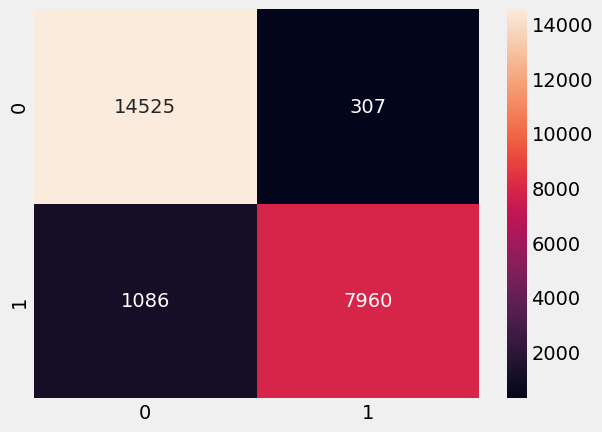

In [ ]:
sns.heatmap(conf_matrix,annot=True, fmt='d')
plt.show()


True Positives (TP): 8015
True Negatives (TN): 14454
False Positives (FP): 378
False Negatives (FN): 1031

In [ ]:
# Define a function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2 , v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplots(figsize = (5,3))
    ax = sns.heatmap(cm/np.sum(cm), annot=labels, fmt="", cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')
    ax.set_title(f'Random Forest Classification')
    plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14832
           1       0.96      0.88      0.92      9046

    accuracy                           0.94     23878
   macro avg       0.95      0.93      0.94     23878
weighted avg       0.94      0.94      0.94     23878


____________



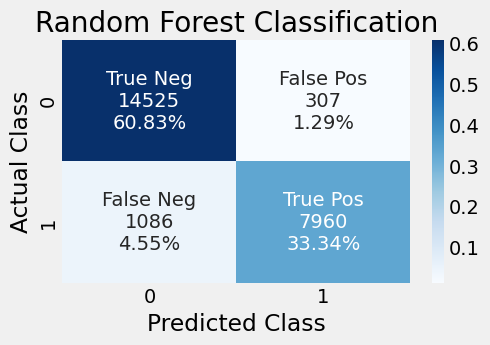

In [ ]:
print(f"Classification report:\n{classification_report(y_test, y_pred)}")
print("")
print("_"*12)
print("")

# Plot the confusion matrix as a heatmap
plot_confusion_matrix(y_test, y_pred)

 Class 0: The model performs very well for class 0, with high precision (93%) and recall (98%), Also  an excellent F1-score (95%).      
 Class 1: The model also performs well for class 1, with higher precision (96%) than for class 0, but lower recall (88%), resulting anyway F1-score (92%).